<a href="https://colab.research.google.com/github/faisu6339-glitch/Statistics/blob/main/Measures_Of_Frequency_Class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("bikes_data.csv")

In [ ]:
data.head()

,Company,Country of Origin,Model,Number of cc,Horsepower,Torque,Transmission Type,Drivetrain,Number of Seating,Price (in INR),Year,Looks,Body Type,Engine Type,Number of Cylinders
0,Aprilia,Italy,RS 660,659,100 hp,67 Nm,6-speed quickshifter,Chain,2,"INR 10,99,000",2021,Sport,Naked,Parallel-twin,2
1,Aprilia,Italy,Tuono 660,659,100 hp,67 Nm,6-speed quickshifter,Chain,2,"INR 11,99,000",2021,Sport,Naked,Parallel-twin,2
2,Aprilia,Italy,RS 125,124.9,15 hp,12 Nm,6-speed manual,Chain,2,"INR 4,49,000",2022,Sport,Racing,Single-cylinder,1
3,Aprilia,Italy,Shiver 900,896,95 hp,90 Nm,6-speed manual,Shaft,2,"INR 13,99,000",2022,Adventure,Naked,V-twin,2
4,Aprilia,Italy,Tuono 1100,1077,175 hp,121 Nm,6-speed manual,Shaft,2,"INR 19,99,000",2022,Adventure,Naked,V-twin,2


In [ ]:
# Ungrouped Freuency

In [ ]:
data["Country of Origin"].unique()

array(['Italy', 'Germany', 'Austria', 'United States', 'United Kingdom',
       'China', 'USA', 'South Korea', 'Japan', 'India', 'Sweden',
       'Taiwan', 'UK', 'Spain', 'France', 'Denmark', 'Canada'],
      dtype=object)

In [ ]:

# Suppose data is already loaded
unique_countries = data["Country of Origin"].unique()
print(unique_countries)

['Italy' 'Germany' 'Austria' 'United States' 'United Kingdom' 'China'
 'USA' 'South Korea' 'Japan' 'India' 'Sweden' 'Taiwan' 'UK' 'Spain'
 'France' 'Denmark' 'Canada']


In [ ]:
data.shape

(362, 15)

In [ ]:
data["Country of Origin"].value_counts()

Country of Origin
Italy             92
India             47
China             44
UK                28
Japan             24
United States     19
Taiwan            18
United Kingdom    17
Austria           14
USA               13
Sweden            12
Spain              9
Germany            8
France             8
South Korea        5
Canada             3
Denmark            1
Name: count, dtype: int64

<Axes: xlabel='Country of Origin'>

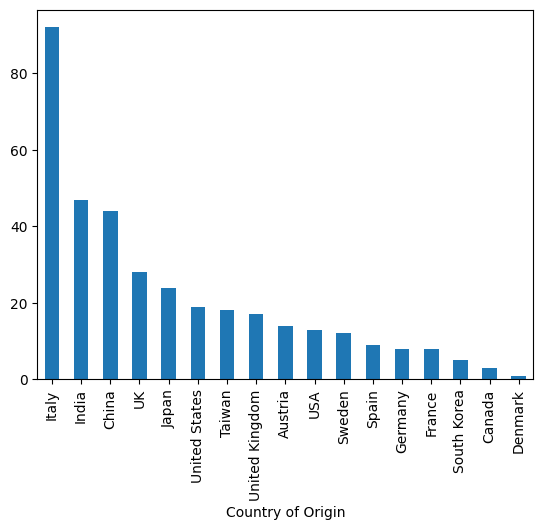

In [ ]:
data["Country of Origin"].value_counts().plot(kind="bar")

In [ ]:
#Number of Cylinders in bike

In [ ]:
data["Number of Cylinders"].unique()

array(['2', '1', '3', '4', '90°', '0', 'Single', nan, 'One', 'Two',
       'Three', 'Parallel-Twin'], dtype=object)

In [ ]:
data["Number of Cylinders"].value_counts()

Number of Cylinders
1                181
2                 66
Single            65
3                 13
4                 11
Two                9
One                7
90°                6
0                  1
Three              1
Parallel-Twin      1
Name: count, dtype: int64

<Axes: xlabel='Number of Cylinders'>

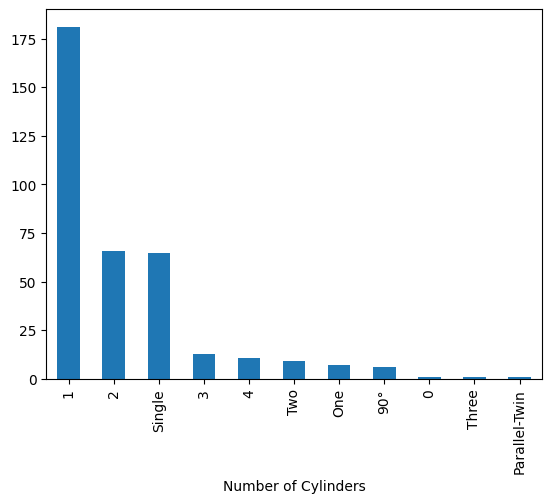

In [ ]:
data["Number of Cylinders"].value_counts().plot(kind="bar")

In [ ]:
#Year of Origin

In [ ]:
data["Year"].value_counts()

Year
2023    216
2022     90
2020     14
2021      7
2017      7
2019      7
2018      5
2016      3
2005      3
2003      2
2014      2
1994      1
2002      1
2000      1
2015      1
2006      1
1998      1
Name: count, dtype: int64

In [ ]:
#Comparison between Year And Price

In [ ]:
#Step 1: Clean and convert the Price column

In [ ]:
def price_to_numeric(price_str):
    if pd.isna(price_str):
        return None

    price_str = str(price_str).strip().lower()

    # Remove common prefixes
    price_str = price_str.replace("inr","").replace("rs.","").replace("rs","").strip()

    try:
        # If commas exist, remove them
        price_str_clean = price_str.replace(",","")

        # Handle lakhs
        if "lakh" in price_str_clean:
            price_str_clean = price_str_clean.replace("lakhs","").replace("lakh","").strip()
            return float(price_str_clean) * 100000
        else:
            # Otherwise just convert to float
            return float(price_str_clean)
    except:
        return None  # return NaN if still cannot convert


In [ ]:
#Step 2: Apply this function to the dataset

In [ ]:
data["Price_INR_Num"] = data["Price (in INR)"].apply(price_to_numeric)

# Check conversion
print(data[["Price (in INR)", "Price_INR_Num"]])


      Price (in INR)  Price_INR_Num
0      INR 10,99,000      1099000.0
1      INR 11,99,000      1199000.0
2       INR 4,49,000       449000.0
3      INR 13,99,000      1399000.0
4      INR 19,99,000      1999000.0
..               ...            ...
357     INR 25 lakhs      2500000.0
358  INR 23.75 lakhs      2375000.0
359  INR 25.25 lakhs      2525000.0
360         7,20,000       720000.0
361         6,89,000       689000.0

[362 rows x 2 columns]


In [ ]:
avg_price_per_year = data.groupby("Year")["Price_INR_Num"].mean()
print(avg_price_per_year)

Year
1994    8.000000e+05
1998    1.000000e+06
2000    1.100000e+06
2002    1.250000e+05
2003    1.050000e+06
2005    6.000000e+05
2006    1.300000e+06
2014    1.084548e+06
2015    2.080000e+05
2016    1.480000e+06
2017    1.234141e+06
2018    2.702500e+05
2019    1.006269e+06
2020    2.697762e+05
2021    1.242571e+06
2022    6.420651e+05
2023    6.603107e+05
Name: Price_INR_Num, dtype: float64


In [ ]:
avg_price_per_year = data.groupby("Year")["Price_INR_Num"].mean()
print("Average Price per Year:\n", avg_price_per_year)

Average Price per Year:
 Year
1994    8.000000e+05
1998    1.000000e+06
2000    1.100000e+06
2002    1.250000e+05
2003    1.050000e+06
2005    6.000000e+05
2006    1.300000e+06
2014    1.084548e+06
2015    2.080000e+05
2016    1.480000e+06
2017    1.234141e+06
2018    2.702500e+05
2019    1.006269e+06
2020    2.697762e+05
2021    1.242571e+06
2022    6.420651e+05
2023    6.603107e+05
Name: Price_INR_Num, dtype: float64


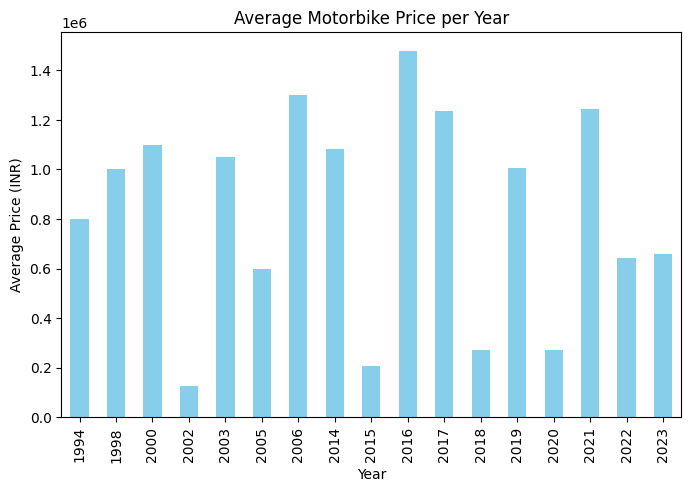

In [ ]:
avg_price_per_year.plot(kind="bar", color="skyblue", figsize=(8,5))
plt.title("Average Motorbike Price per Year")
plt.xlabel("Year")
plt.ylabel("Average Price (INR)")
plt.show()

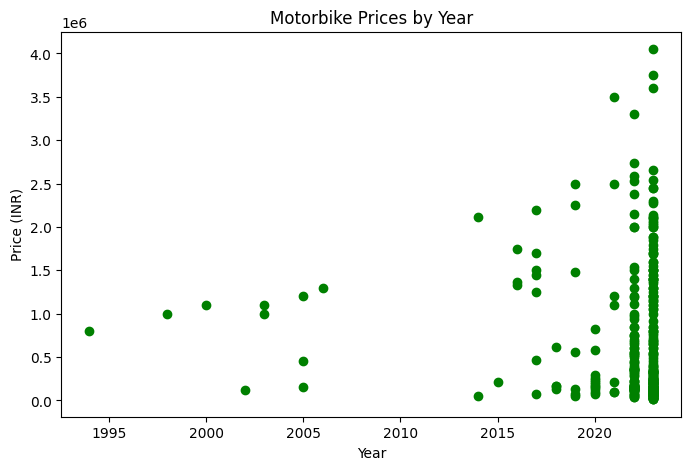

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(data["Year"], data["Price_INR_Num"], color="green")
plt.title("Motorbike Prices by Year")
plt.xlabel("Year")
plt.ylabel("Price (INR)")
plt.show()


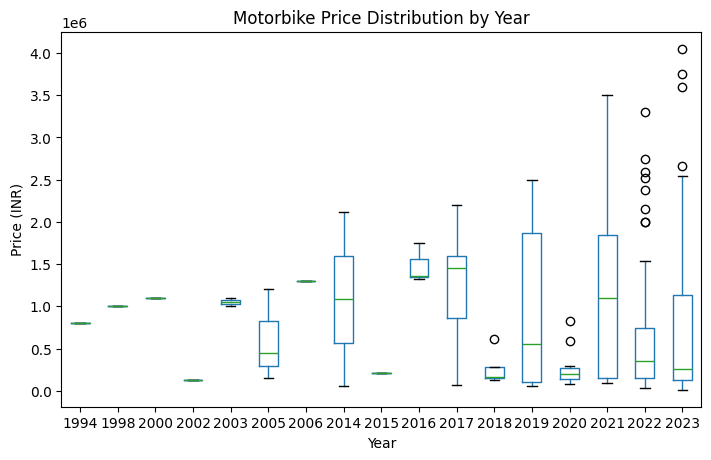

In [ ]:
data.boxplot(column="Price_INR_Num", by="Year", grid=False, figsize=(8,5))
plt.title("Motorbike Price Distribution by Year")
plt.suptitle("")  # Remove automatic subtitle
plt.xlabel("Year")
plt.ylabel("Price (INR)")
plt.show()


In [ ]:
#Find the most expensive bike per year

In [ ]:
# Find the index of the max price per year
idx_max_price = data.groupby("Year")["Price_INR_Num"].idxmax()

# Subset of most expensive bikes
most_expensive_bikes = data.loc[idx_max_price]
print(most_expensive_bikes[["Year", "Model", "Price_INR_Num"]])


     Year               Model  Price_INR_Num
33   1994         Elefant 900       800000.0
34   1998       V-Raptor 1000      1000000.0
35   2000    Gran Canyon 1100      1100000.0
32   2002            Mito 125       125000.0
29   2003       XB9R Firebolt      1100000.0
30   2005     XB12S Lightning      1200000.0
28   2006             Ulysses      1300000.0
355  2014                 Ego      2115000.0
106  2015            Mojo 300       208000.0
115  2016            Eldorado      1750000.0
244  2017              Vision      2200000.0
333  2018            TNT 600i       619000.0
357  2019           EsseEsse9      2500000.0
234  2020        Dragster 200       829000.0
182  2021            LiveWire      3500000.0
124  2022               Atlas      3299000.0
58   2023  Road Glide Special      4049000.0


In [ ]:
#Scatter plot with highlights

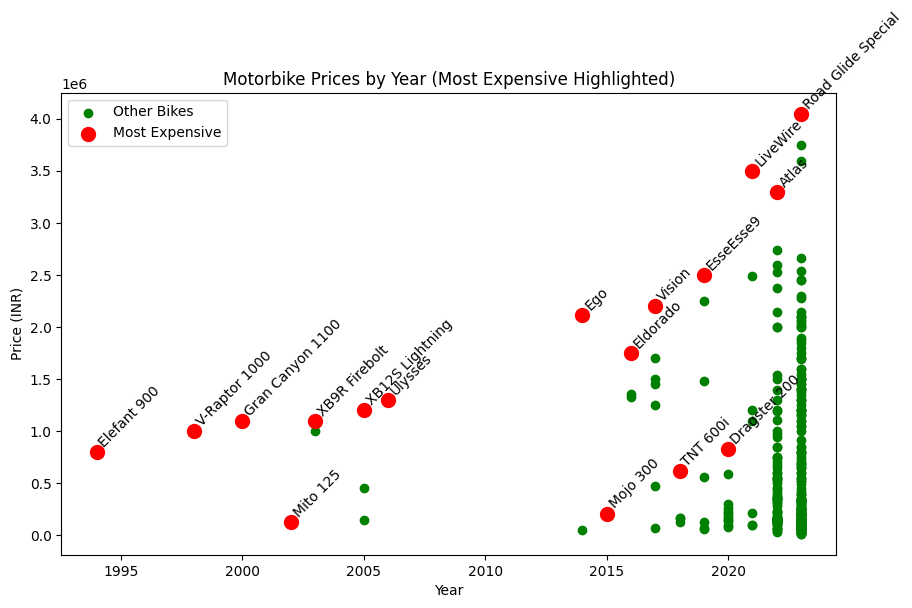

In [ ]:
plt.figure(figsize=(10,6))

# Plot all bikes
plt.scatter(data["Year"], data["Price_INR_Num"], color="green", label="Other Bikes")

# Highlight most expensive bikes
plt.scatter(most_expensive_bikes["Year"], most_expensive_bikes["Price_INR_Num"],
            color="red", s=100, label="Most Expensive")

# Annotate the points with Model names
for i, row in most_expensive_bikes.iterrows():
    plt.text(row["Year"], row["Price_INR_Num"]+50000, row["Model"], rotation=45)

plt.title("Motorbike Prices by Year (Most Expensive Highlighted)")
plt.xlabel("Year")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()


In [ ]:
#Relative frequency

In [ ]:
#Frequency table of a categorical column

In [ ]:
# Frequency counts of Country of Origin
freq_country = data["Country of Origin"].value_counts()
print("Frequency of each country:\n", freq_country)

Frequency of each country:
 Country of Origin
Italy             92
India             47
China             44
UK                28
Japan             24
United States     19
Taiwan            18
United Kingdom    17
Austria           14
USA               13
Sweden            12
Spain              9
Germany            8
France             8
South Korea        5
Canada             3
Denmark            1
Name: count, dtype: int64


In [ ]:
#Calculate Relative Frequency

In [ ]:
rel_freq_country = data["Country of Origin"].value_counts(normalize=True)
print("\nRelative Frequency (as fraction):\n", rel_freq_country)
print("\nRelative Frequency (as %):\n", (rel_freq_country*100).round(2))


Relative Frequency (as fraction):
 Country of Origin
Italy             0.254144
India             0.129834
China             0.121547
UK                0.077348
Japan             0.066298
United States     0.052486
Taiwan            0.049724
United Kingdom    0.046961
Austria           0.038674
USA               0.035912
Sweden            0.033149
Spain             0.024862
Germany           0.022099
France            0.022099
South Korea       0.013812
Canada            0.008287
Denmark           0.002762
Name: proportion, dtype: float64

Relative Frequency (as %):
 Country of Origin
Italy             25.41
India             12.98
China             12.15
UK                 7.73
Japan              6.63
United States      5.25
Taiwan             4.97
United Kingdom     4.70
Austria            3.87
USA                3.59
Sweden             3.31
Spain              2.49
Germany            2.21
France             2.21
South Korea        1.38
Canada             0.83
Denmark            0.28

In [ ]:
#Visualize Relative Frequency

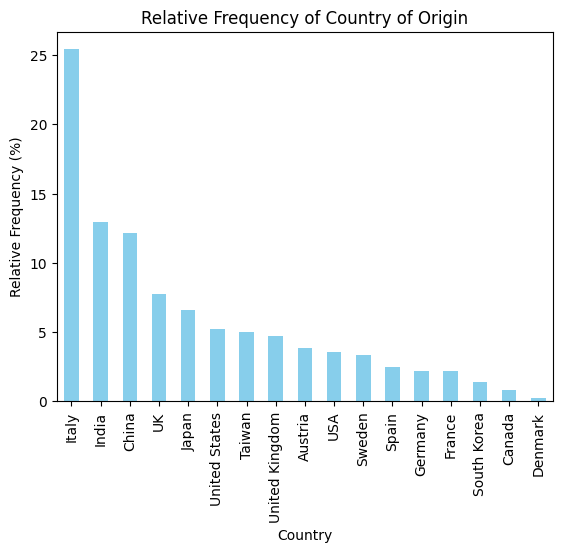

In [ ]:

# Bar plot of relative frequencies
(rel_freq_country*100).plot(kind="bar", color="skyblue")
plt.title("Relative Frequency of Country of Origin")
plt.xlabel("Country")
plt.ylabel("Relative Frequency (%)")
plt.show()

In [ ]:
#Frequency and Relative Frequency

In [ ]:
# Frequency (number of bikes) per Country of Origin
freq_country = data["Country of Origin"].value_counts()

In [ ]:
# Relative frequency per Country of Origin
rel_freq_country = data["Country of Origin"].value_counts(normalize=True) * 100

In [ ]:

# Combine into a single table
country_summary = pd.DataFrame({
    "Number of Bikes": freq_country,
    "Relative Frequency (%)": rel_freq_country.round(2)
})

print(country_summary)

                   Number of Bikes  Relative Frequency (%)
Country of Origin                                         
Italy                           92                   25.41
India                           47                   12.98
China                           44                   12.15
UK                              28                    7.73
Japan                           24                    6.63
United States                   19                    5.25
Taiwan                          18                    4.97
United Kingdom                  17                    4.70
Austria                         14                    3.87
USA                             13                    3.59
Sweden                          12                    3.31
Spain                            9                    2.49
Germany                          8                    2.21
France                           8                    2.21
South Korea                      5                    1.

In [ ]:
#: Visualization (Comparison)

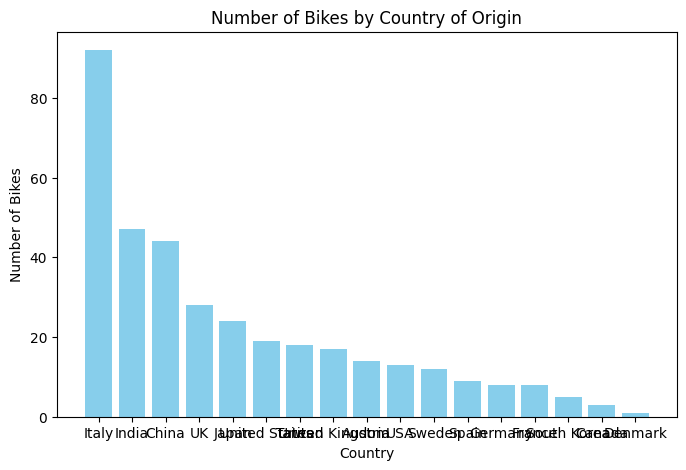

In [ ]:
# Create a bar chart for number of bikes
plt.figure(figsize=(8,5))
plt.bar(country_summary.index, country_summary["Number of Bikes"], color="skyblue")
plt.title("Number of Bikes by Country of Origin")
plt.xlabel("Country")
plt.ylabel("Number of Bikes")
plt.show()

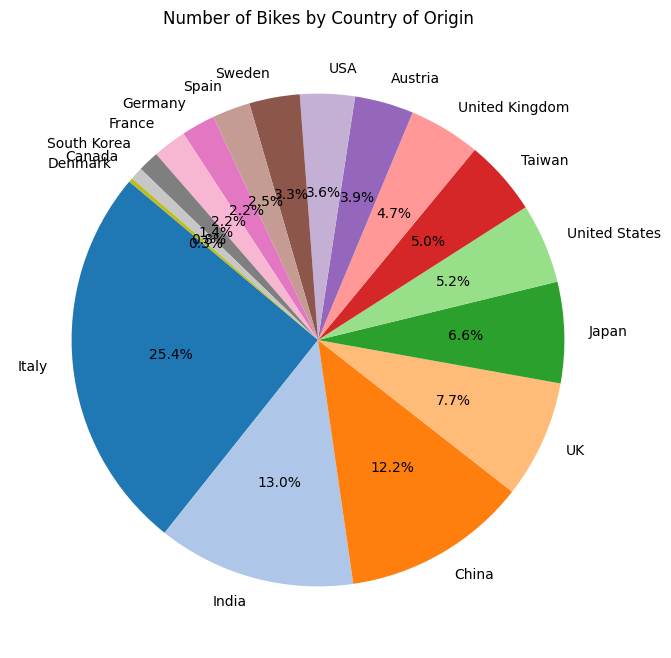

In [ ]:
# Create a pichar chart for number of bikes
# Sizes = number of bikes
sizes = country_summary["Number of Bikes"]

# Labels = country names
labels = country_summary.index

# Optional colors
colors = plt.cm.tab20.colors  # automatically pick a color palette

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Number of Bikes by Country of Origin")
plt.show()

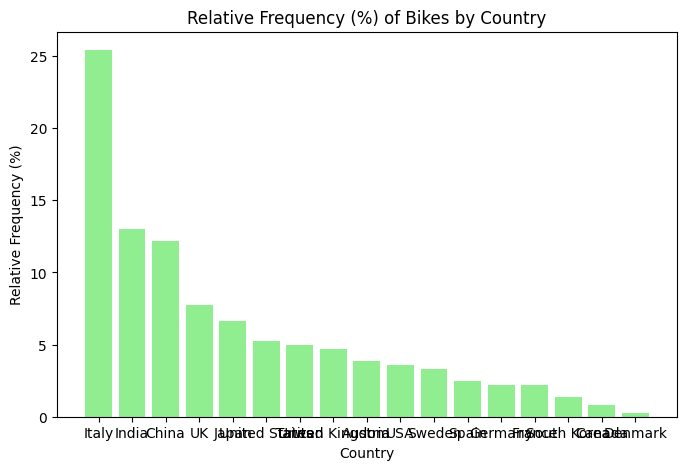

In [ ]:
# Create a bar chart for relative frequency
plt.figure(figsize=(8,5))
plt.bar(country_summary.index, country_summary["Relative Frequency (%)"], color="lightgreen")
plt.title("Relative Frequency (%) of Bikes by Country")
plt.xlabel("Country")
plt.ylabel("Relative Frequency (%)")
plt.show()

In [ ]:
#Combined Bar Chart

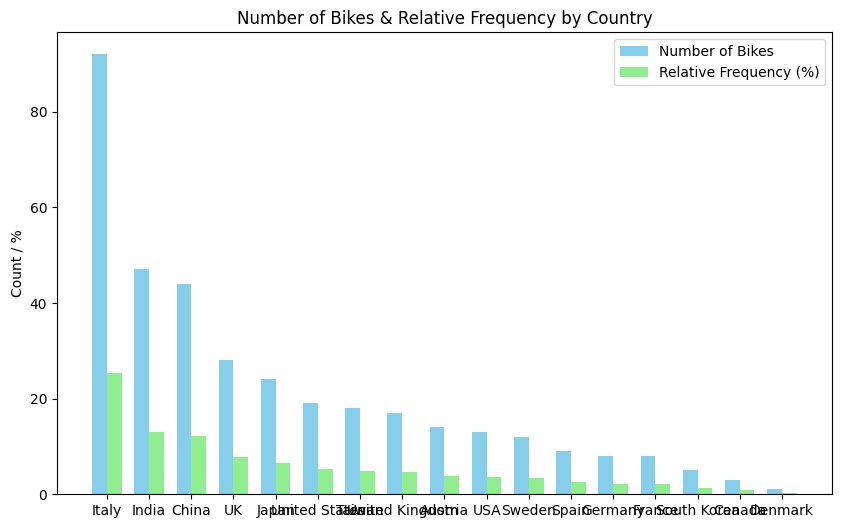

In [ ]:

x = np.arange(len(country_summary))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, country_summary["Number of Bikes"], width, label="Number of Bikes", color="skyblue")
plt.bar(x + width/2, country_summary["Relative Frequency (%)"], width, label="Relative Frequency (%)", color="lightgreen")
plt.xticks(x, country_summary.index)
plt.title("Number of Bikes & Relative Frequency by Country")
plt.ylabel("Count / %")
plt.legend()
plt.show()

In [ ]:
#Grouped Frequency

In [ ]:
data.head(2)

,Company,Country of Origin,Model,Number of cc,Horsepower,Torque,Transmission Type,Drivetrain,Number of Seating,Price (in INR),Year,Looks,Body Type,Engine Type,Number of Cylinders,Price_INR_Num
0,Aprilia,Italy,RS 660,659,100 hp,67 Nm,6-speed quickshifter,Chain,2,"INR 10,99,000",2021,Sport,Naked,Parallel-twin,2,1099000.0
1,Aprilia,Italy,Tuono 660,659,100 hp,67 Nm,6-speed quickshifter,Chain,2,"INR 11,99,000",2021,Sport,Naked,Parallel-twin,2,1199000.0
